<h1>Download the Dataset</h1>
<p>Download the Dataset from the following link: 
https://www.kaggle.com/neuromusic/avocado-prices</>

<h1>Import Libraries</h1>

In [1165]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sb

#data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#data modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor 

#data performance
from sklearn.metrics import  r2_score

<h1>Reading the Dataset</h1>
<ul>
<li>Read the dataset into a Pandas DataFrame.</li>
<li>Drop if there are missing values.</li>
</ul>

<h2>Reading avocado dataset</h2>

In [1166]:
#Reading dataset
avocado = pd.read_csv('avocado.csv')

#dataset overview
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<h2>Check variables data types in the dataset</h2>

In [1167]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<p>We can conclude:</p>
<ul>
    <li>There are 18249 observations of 14 variables in the dataset</li>
    <li>3 categoricals and 11 numericals</li>
    <li>The variable Date should have a type of DateTime</li>
</ul>

<h2>Numerical variables statistics</h2>

In [1168]:
#Describe numerical variables
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<h1>Extract Features and target</h1>
<p>Exclude unecessary columns: Unnamed: 0, region, XLarge Bags, type, year and date from the considered features.</p>
<p>target : average price</p>

In [1169]:
#drop columns: Unnamed: 0, region, XLarge Bags, type, year and date
avocado.drop(['Unnamed: 0', 'region', 'Date', 'XLarge Bags'], axis = 1, inplace = True)

#Target
y = avocado['AveragePrice']

#Features
X = avocado.drop('AveragePrice', axis = 1)

In [1170]:

#remove outiliers with threshold = 15
num_features = [col for col in X.columns if col not in ['year', 'type']]
X[num_features] = X[num_features][(X[num_features] >=X[num_features].quantile(0.25) - 15*(X[num_features].quantile(0.75) -X[num_features].quantile(0.25))) & (X[num_features] <=X[num_features].quantile(0.75) + 15*(X[num_features].quantile(0.75) -X[num_features].quantile(0.25)))]
X[num_features].describe()


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
count,1.797200e+04,1.749500e+04,1.790900e+04,17274.000000,1.784000e+04,1.781000e+04,17718.000000
mean,5.010829e+05,1.019569e+05,1.628548e+05,5828.981051,1.265833e+05,9.454709e+04,22531.729015
std,1.092245e+06,2.308160e+05,3.571329e+05,14534.963734,2.581144e+05,1.973769e+05,49305.326001
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.063070e+04,7.771350e+02,2.909310e+03,0.000000,4.870630e+03,2.644765e+03,107.152500
50%,1.017448e+05,6.860310e+03,2.669089e+04,131.650000,3.709693e+04,2.407613e+04,2367.280000
75%,4.057879e+05,8.914284e+04,1.316849e+05,4039.017500,1.021164e+05,7.816765e+04,18130.102500
max,6.760002e+06,1.757284e+06,2.356360e+06,99791.220000,1.688132e+06,1.288632e+06,350202.790000


<h1>Perform Preprocessing</h1>
<p>Perform any needed pre-processing on the chosen features including:</p>
<ul>
<li>Scaling.</li>
<li>Encoding.</li>
<li>Dealing with Nan values.</li>
</ul>

#### Pre-processing

In [1171]:
#Encoding variable "type"
type_classes = list(X['type'].unique())
X[type_classes] = OneHotEncoder(sparse_output = False).fit_transform(X[['type']])
X.drop('type', axis = 1, inplace = True)

#Encoding variable "year"
X['year'] = OrdinalEncoder().fit_transform(X[['year']])

#Scaling numerical variables
num_features = [col for col in X.columns if col not in ['year', 'conventional', 'organic']]
X[num_features] = (X[num_features] - X[num_features].median()) / (X[num_features].quantile(0.75) - X[num_features].quantile(0.25))

#Scaling target variable
y = (y - y.median()) / (y.quantile(0.75) - y.quantile(0.25))

####  Dealing with missing values

In [1172]:
X.isna().sum()

Total Volume    277
4046            754
4225            340
4770            975
Total Bags      409
Small Bags      439
Large Bags      531
year              0
conventional      0
organic           0
dtype: int64

In [1173]:
y.isna().sum()

np.int64(0)

In [1174]:
Z = X
Z['AveragePrice'] = y

Z = Z.dropna()
Z.isna().sum()

y = Z['AveragePrice']
X = Z.drop('AveragePrice', axis = 1)
X.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'year', 'conventional', 'organic'],
      dtype='object')

### Check for correlation

<Axes: >

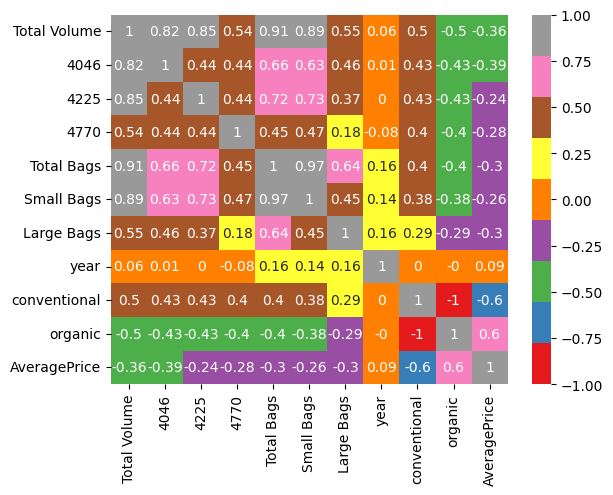

In [1175]:
sb.heatmap(Z.corr().round(2), annot = True, cmap = 'Set1')

##### We can conclude: "small Bags" and "Total Bags" are highly correlated. We can drop "Total Bags" in the features

## Histogramm of numerical variables

array([[<Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>],
       [<Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>],
       [<Axes: title={'center': 'Large Bags'}>, <Axes: >, <Axes: >]],
      dtype=object)

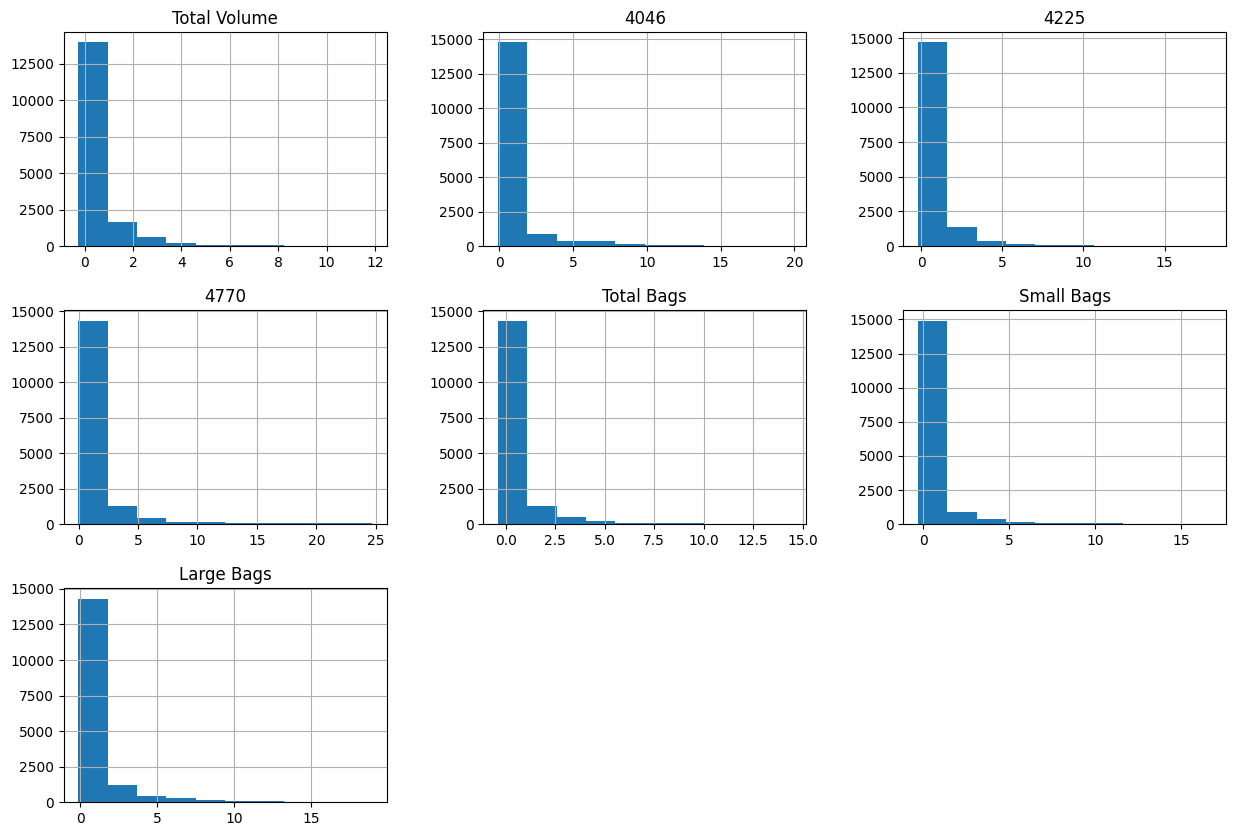

In [1176]:
X[num_features].hist(figsize=(15,10))


<Axes: >

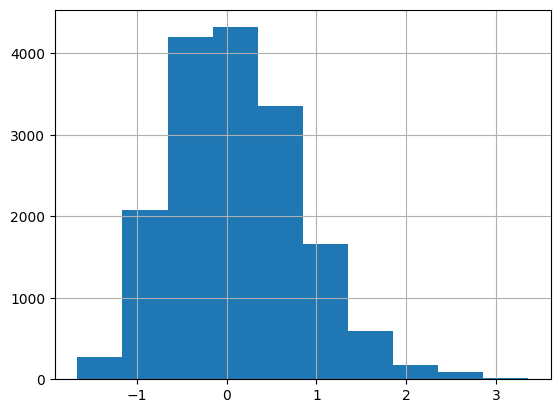

In [1177]:

y.hist()

##### We can conclude that all features have long right tail, but the target has almost normal distributed.
##### So, linear regression is not suitable as model.

# Splitting the Data
#### Split your data as follows:
##### - 80% training set.
##### - 20% validation set.


In [1178]:
#Split features to train and test values for reduced features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#drop categorical variables
#X_train = X_train.drop(['Total Bags'], axis = 1)
#X_test = X_test.drop(['Total Bags'], axis = 1)

X_train.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'year', 'conventional', 'organic'],
      dtype='object')

# Train model using KNN Regression
#### Use a KNN Regressor model to train your data.
#### Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
#### Regression Metrics
#### Print the R-squared score of your final KNN regressor.

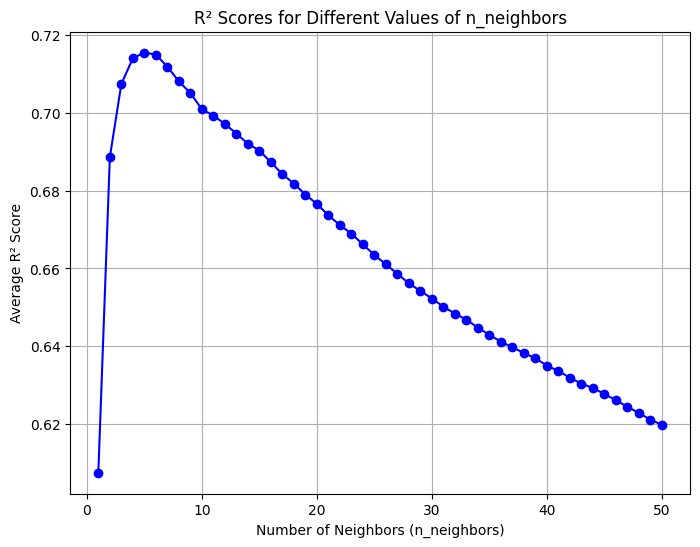

optimal_k = 5
Optimal score =, 71.50%
test score = 73.15%


In [1179]:
# Cross-validation for choosing the optimal k in KNN
def choose_optimal_k(X, y, max_k=50):
    #initialize mean scores
    r2_scores = []

    # List of n_neighbors values to test
    neighbors_range = range(1, 51)  # Number of neighbors from 1 to 20

    # List to store R^2 scores for each value of n_neighbors
    r2_scores = []

    # Perform cross-validation for each n_neighbors value
    for n in neighbors_range:
        model = KNeighborsRegressor(n_neighbors=n)
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
        r2_scores.append(np.mean(scores))  # Append the average R^2 score
    optimal_k = np.argmax(r2_scores) + 1
    optimal_score = r2_scores[optimal_k]

    # Plot the R^2 scores for each n_neighbors value
    plt.figure(figsize=(8, 6))
    plt.plot(neighbors_range, r2_scores, marker='o', linestyle='-', color='b')
    plt.title('R² Scores for Different Values of n_neighbors')
    plt.xlabel('Number of Neighbors (n_neighbors)')
    plt.ylabel('Average R² Score')
    plt.grid(True)
    plt.show()
    return optimal_k, optimal_score

def knn(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsRegressor(n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.score(X_test, y_test)
    return y_score

def main():
    n_neighbors, optimal_score = choose_optimal_k(X_train, y_train)
    print(f'optimal_k = {n_neighbors}')
    print(f'Optimal score =, {optimal_score*100:.2f}%')
    y_score = knn(X_train, y_train, X_test, y_test, n_neighbors)
    print(f'test score = {y_score*100:.2f}%')

main()


# Train model using Linear Regression
#### Use a Linear Regressor model to train your data.
#### Regression Metrics
#### Print the R-squared score

In [1180]:

#Initialize the model
model = LinearRegression()

#train the model on X_train and y_train
model.fit(X_train, y_train)

#predict output using the trained model
y_pred = model.predict(X_test)

#print model parameters
print(f'Intercept:, {model.intercept_}\n')
print(f'Coefficients:, {model.coef_}\n')

#Evaluate performance using r2-score
y_score = model.score(X_test, y_test)
print(f'test R2-score = {y_score*100:.2f}%')


Intercept:, 1.243899653027536

Coefficients:, [13.14473541 -2.99366257 -4.23114911 -0.14301639 -1.71484363 -1.18808273
 -0.32227067  0.07577775 -0.38395716  0.38395716]

test R2-score = 41.35%


### We can conculde that K-Neighbors Regression gives us the better result in term of performance.
##### Perpective : What we can do to improve performance?